In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
from IPython.display import display, IFrame

set_matplotlib_formats("svg")
sns.set_context("poster")
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
pd.set_option("display.max_rows", 8)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Lecture 5 – Exploring and Cleaning Data

## DSC 80, Fall 2023

## 📣 Announcements 📣

- Project 1 due Wed!
- Lab 3 out, due on Mon

## 📆 Agenda

- [ ] Introduce dataset
- [ ] Introduce `plotly`
- [ ] Statistical vs. computational data types
- [ ] Data cleaning
    - [ ] Data quality checks
    - [ ] Missing data
    - [ ] Transformations and timestamps
    - [ ] Modifying structure
- [ ] Investigating student-submitted questions

## San Diego Food Safety

> In the last three years, one third of San Diego County restaurants have had at least one major food safety violation.

https://inewsource.org/2023/02/09/san-diego-restaurants-food-safety-violations/

(https://archive.ph/gz8BL)

### 99% Of San Diego Restaurants Earn ‘A' Grades, Bringing Usefulness of System Into Question

> Food held at unsafe temperatures. Employees not washing their hands. Dirty countertops. Vermin in the kitchen. An expired restaurant permit.
> 
> Restaurant inspectors for San Diego County found these violations during a routine health inspection of a diner in La Mesa in November 2016. Despite the violations, the restaurant was awarded a score of 90 out of 100, the lowest possible score to achieve an ‘A’ grade.

https://www.nbcsandiego.com/news/local/99-of-san-diego-restaurants-earn-a-grades-bringing-usefulness-of-system-into-question/25381/

(https://archive.ph/yB6RU)

### The Data

https://www.sandiegocounty.gov/content/sdc/deh/fhd/ffis/intro.html.html

- Had to download the data as JSON, then process into dataframes (will cover in future weeks!)
- Downloaded the 1000 restaurants closest to UCSD.


In [3]:
rest = pd.read_csv('data/restaurants.csv')
insp = pd.read_csv('data/inspections.csv')
viol = pd.read_csv('data/violations.csv')

### Understanding the Data

![](imgs/ds-lifecycle.svg)

### Aside: Working with files

- So far, all data came in CSV files that loaded without problem.
- But many different formats and possible issues in loading in data!
- See [Chapter 8 of Learning DS](https://learningds.org/ch/08/files_intro.html) for more.

### You Try: Looking at the Data

- The articles said that one third of restaurants had at least one major safety violation.
- Which dataframes and columns seem most useful to verify this?

In [5]:
rest.head(2)

,business_id,name,business_type,address,...,lat,long,opened_date,distance
0,211898487641,MOBIL MART LA JOLLA VILLAGE,Pre-Packaged Retail Market,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",...,32.87,-117.23,2002-05-05,0.62
1,211930769329,CAFE 477,Low Risk Food Facility,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",...,32.87,-117.24,2023-07-24,0.64


In [6]:
insp.head(2)

,custom_id,business_id,inspection_id,description,...,completed_date,status,link,status_link
0,DEH2002-FFPN-310012,211898487641,6886133,NaN,...,2023-02-16,Complete,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...
1,DEH2002-FFPN-310012,211898487641,6631228,NaN,...,2022-01-03,Complete,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...,http://www.sandiegocounty.gov/deh/fhd/ffis/ins...


In [7]:
# Fill me in
viol.head(2)

,inspection_id,violation,major_violation,status,violation_text,correction_type_link,violation_accela,link
0,6886133,Hot and Cold Water,Y,Out of Compliance - Major,Hot and Cold Water,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...,21. Hot & cold water available,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...
1,6631228,Hot and Cold Water,N,Out of Compliance - Minor,Hot and Cold Water,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...,21. Hot & cold water available,http://www.sandiegocounty.gov/deh/fhd/ffis/vio...


## Using `plotly` for Data Visualization

I've used `plotly` before in class, but let's talk about it now.

- Library for interactive data visualizations
- Install with `conda install plotly`
    - Discussion this week: why use `conda install` instead of `pip install`?

### `plotly.express` Syntax

`plotly` is very flexible but can be verbose. We use `plotly.express` to make plots quickly.

- Docs: https://plotly.com/python/plotly-express


In [9]:
# Will include this at the top of each notebook from now on.
import plotly.express as px

# DSC 80 preferred styles, but not necessary
import plotly.graph_objects as go
import plotly.io as pio
pio.templates["dsc80"] = go.layout.Template(
    layout=dict(
        margin=dict(l=30, r=30, t=30, b=30),
        autosize=True,
        width=600,
        height=400,
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True),
        title=dict(x=0.5, xanchor="center"),
    )
)
pio.templates.default = "simple_white+dsc80"

In [10]:
fig = px.histogram(insp['score'])
fig

In [11]:
scores = (
    insp[['grade', 'score']]
    .dropna()
    .groupby('grade')
    .mean()
    .reset_index()
)
px.bar(scores, x='grade', y='score')

## Feature Types

### Different Kinds of data

<center><img src='imgs/data-types.png' width=90%></center>

### Discussion Question

Determine the kind of each of the following variables:

- `insp['score']`
- `insp['grade']`
- `viol['violation_accela']`
- `viol['major_violation']`
- `rest['business_id']`
- `rest['opened_date']`

In [20]:
insp['score'] #continuous
insp['grade'] #ordinal
viol['violation_accela'] #nominal
viol['major_violation'] #ordinal
rest['business_id'] #ordinal
rest['opened_date'] #continuous

0      2002-05-05
1      2023-07-24
2      2019-01-22
3      2020-11-20
          ...    
996    2017-01-18
997    2002-05-05
998    2016-11-03
999    2022-11-03
Name: opened_date, Length: 1000, dtype: object

### Feature types vs. data types

- The data type `pandas` uses is not the same as the "data type" we talked about just now!
    - Difference between feature type vs. computational data type.
- Take care when the two don't match up very well!

In [21]:
# pandas stores as int, but actually nominal
rest['business_id']

0      211898487641
1      211930769329
2      211909057778
3      211921416009
           ...     
996    211924765619
997    211899338714
998    211942150255
999    211925713322
Name: business_id, Length: 1000, dtype: int64

In [22]:
# pandas stores as string, but actually numeric
rest['opened_date']

0      2002-05-05
1      2023-07-24
2      2019-01-22
3      2020-11-20
          ...    
996    2017-01-18
997    2002-05-05
998    2016-11-03
999    2022-11-03
Name: opened_date, Length: 1000, dtype: object

## Data Cleaning: Quality Checks

We often start an analysis by checking the quality of the data.

- Scope: Do the data match your understanding of the population? 
- Measurements and values: Are the values reasonable?
- Relationships: Are related features in agreement?
- Analysis: Which features might be useful in a future analysis? 

### Scope

In [23]:
rest.head(2)

,business_id,name,business_type,address,...,lat,long,opened_date,distance
0,211898487641,MOBIL MART LA JOLLA VILLAGE,Pre-Packaged Retail Market,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",...,32.87,-117.23,2002-05-05,0.62
1,211930769329,CAFE 477,Low Risk Food Facility,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",...,32.87,-117.24,2023-07-24,0.64


### Measurements and Values

In [24]:
insp['grade'].value_counts()

A    2978
B      11
Name: grade, dtype: int64

In [25]:
insp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5179 entries, 0 to 5178
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custom_id       5179 non-null   object 
 1   business_id     5179 non-null   int64  
 2   inspection_id   5179 non-null   int64  
 3   description     0 non-null      float64
 4   type            5179 non-null   object 
 5   score           5179 non-null   int64  
 6   grade           2989 non-null   object 
 7   completed_date  5179 non-null   object 
 8   status          5179 non-null   object 
 9   link            5179 non-null   object 
 10  status_link     5179 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 445.2+ KB


In [12]:
(rest[rest.duplicated(subset=['address'])]
 .sort_values('address')
)

,business_id,name,business_type,address,...,lat,long,opened_date,distance
402,211898699154,HANAYA SUSHI CAFE,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",...,32.90,-117.19,2011-03-22,2.77
406,211899308875,NASEEMS BAKERY & KABOB,Restaurant Food Facility,"10066 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 92121",...,32.90,-117.19,2012-04-17,2.77
412,211976116534,QUALCOMM CAFE AZ,Restaurant Food Facility,"10165 PACIFIC HEIGHTS BLVD, SAN DIEGO, CA 9212...",...,32.90,-117.19,2014-01-16,2.81
132,211921220423,INTERNATIONAL COFFEE SCRIPPS GEISEL HEALTH CLINIC,Single Operating Site,"10666 N TORREY PINES RD, LA JOLLA, CA 92037-1027",...,32.90,-117.24,2020-11-20,1.39
...,...,...,...,...,...,...,...,...,...
572,211943123695,DAILY CHEW CATERING,Caterer,"9932 MESA RIM RD, SUITE# A, SAN DIEGO, CA 9212...",...,32.90,-117.18,2020-11-04,3.51
540,211911015928,KUMO,Retail Food Processing,"9932 MESA RIM RD, SUITE# A, SAN DIEGO, CA 9212...",...,32.90,-117.18,2022-05-31,3.40
575,211972411855,TARA HEATHER CAKE DESIGN,Caterer,"9932 MESA RIM RD, SUITE# A, SAN DIEGO, CA 9212...",...,32.90,-117.18,2014-04-24,3.51
344,211990537315,COMPASS GROUP FEDEX EXPRESS OLSON,Pre-Packaged Retail Market,"9999 OLSON DR, SAN DIEGO, CA 92121-2837",...,32.89,-117.20,2022-10-19,2.27


### Relationships

In [26]:
# Useful to check whether ZIP codes match!
rest[['address', 'zip']]

,address,zip
0,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",92037
1,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",92037-1704
2,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",92037
3,"9888 GENESEE AVE, LA JOLLA, CA 92037-1205",92037-1205
...,...,...
996,"12873 EL CAMINO REAL, SUITE# M4, SAN DIEGO, CA...",92130
997,"1234 TOURMALINE ST, SAN DIEGO, CA 92109-1856",92109-1856
998,"12925 EL CAMINO REAL, SUITE# AA4, SAN DIEGO, C...",92130
999,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",92014


In [27]:
insp[['score', 'grade']]

,score,grade
0,96,NaN
1,98,NaN
2,98,NaN
3,100,A
...,...,...
5175,84,B
5176,0,NaN
5177,0,NaN
5178,90,A


### Analysis

- Most interested in:
    - `rest` df: `business_id`, `name`, `address`, `opened_date` from `rest`
    - `insp` df: `business_id`, `inspection_id`, `score`, `grade`, `completed_date`, `status`
    - `viol` df: `inspection_id`, `violation`, `major_violation`, `violation_text`, `violation_accela`
- Also, let's rename a few columns to make them easier to work with.

### 💡 Pro-Tip: Using `pipe`

When we manipulate dataframes, we prefer to define individual functions for each step, then use `df.pipe` to chain them all together.

- In practice, we would add functions one by one to the top of a notebook, then `pipe` them all.
- For today, will keep re-running `pipe` to show data cleaning process.

In [30]:
def subset_rest(rest):
    return rest[['business_id', 'name', 'address', 'opened_date']]

rest = (
    pd.read_csv('data/restaurants.csv')
    .pipe(subset_rest)
)
rest

,business_id,name,address,opened_date
0,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",2002-05-05
1,211930769329,CAFE 477,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",2023-07-24
2,211909057778,VALLEY FARM MARKET,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",2019-01-22
3,211921416009,INTERNATIONAL COFFEE,"9888 GENESEE AVE, LA JOLLA, CA 92037-1205",2020-11-20
...,...,...,...,...
996,211924765619,MENDOCINO FARMS SANDWICH MARKET,"12873 EL CAMINO REAL, SUITE# M4, SAN DIEGO, CA...",2017-01-18
997,211899338714,PACIFIC BEACH ELEMENTARY,"1234 TOURMALINE ST, SAN DIEGO, CA 92109-1856",2002-05-05
998,211942150255,POKEWAN DEL MAR,"12925 EL CAMINO REAL, SUITE# AA4, SAN DIEGO, C...",2016-11-03
999,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",2022-11-03


In [31]:
def subset_insp(insp):
    return (
        insp[['business_id', 'inspection_id', 'score', 'grade', 'completed_date', 'status']]
        .rename(columns={'completed_date': 'date'})
    )

insp = (
    pd.read_csv('data/inspections.csv')
    .pipe(subset_insp)
)

In [32]:
def subset_viol(viol):
    return (
        viol[['inspection_id', 'violation', 'major_violation', 'violation_accela']]
        .rename(columns={'violation': 'kind',
                         'major_violation': 'is_major',
                         'violation_accela': 'violation'})
    )

viol = (
    pd.read_csv('data/violations.csv')
    .pipe(subset_viol)
)

### Joining the Restaurant Data

Let's join all three dataframes together so that we have all the data in one dataframe:

In [33]:
def merge_all_restaurant_data():
    return (
        rest
        .merge(insp, on='business_id', how='left')
        .merge(viol, on='inspection_id', how='left')
    )

df = merge_all_restaurant_data()
df

,business_id,name,address,opened_date,...,status,kind,is_major,violation
0,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",2002-05-05,...,Complete,Hot and Cold Water,Y,21. Hot & cold water available
1,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",2002-05-05,...,Complete,Hot and Cold Water,N,21. Hot & cold water available
2,211898487641,MOBIL MART LA JOLLA VILLAGE,"3233 LA JOLLA VILLAGE DR, LA JOLLA, CA 92037",2002-05-05,...,Complete,Holding Temperatures,N,7. Proper hot & cold holding temperatures
3,211930769329,CAFE 477,"8950 VILLA LA JOLLA DR, SUITE# B123, LA JOLLA,...",2023-07-24,...,Complete,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8727,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",2022-11-03,...,Complete,Nonfood Contact Surfaces Clean,N,33. Nonfood contact surfaces clean
8728,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",2022-11-03,...,Complete,"Equipment and Utensil Storage, Use",N,"35. Equipment / Utensils -approved, installed,..."
8729,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",2022-11-03,...,Complete,Toilet Facilities,N,"43. Toilet facilities -properly constructed, s..."
8730,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",2022-11-03,...,Complete,"Floors, Walls, and Ceilings",N,"45. Floor, walls and ceilings - built, maintai..."


## Data Cleaning: Looking for Missing Values

Next, it's important to check for missing values, as they can have a big effect on your analysis.

In [34]:
insp[['score', 'grade']]

,score,grade
0,96,NaN
1,98,NaN
2,98,NaN
3,100,A
...,...,...
5175,84,B
5176,0,NaN
5177,0,NaN
5178,90,A


In [35]:
df[df['inspection_id'].isna()]

,business_id,name,address,opened_date,...,status,kind,is_major,violation
759,211941133403,TASTY CHAI,"8878 REGENTS RD 105, SAN DIEGO, CA 92122-5853",2019-01-07,...,NaN,NaN,NaN,NaN
1498,211915545446,EMBASSY SUITES SAN DIEGO LA JOLLA,"4550 LA JOLLA VILLAGE DR, SAN DIEGO, CA 92122-...",2022-11-22,...,NaN,NaN,NaN,NaN
1672,211937443689,SERVICENOW,"4770 EASTGATE MALL, SAN DIEGO, CA 92121-1970",2023-06-06,...,NaN,NaN,NaN,NaN
2526,211915567037,CAFE BOLERO,"5623 STRESEMANN ST, SAN DIEGO, CA 92122-3125",2022-09-14,...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8008,211999542439,CANDRA'S DELIGHTFUL DESSERTS LLC,"4233 MT VOSS DR, SAN DIEGO, CA 92117-4753",2022-08-30,...,NaN,NaN,NaN,NaN
8094,211997340975,COOKIE SCOOP,"7759 GASTON DR, SAN DIEGO, CA 92126-3036",2016-05-04,...,NaN,NaN,NaN,NaN
8450,211900595220,I LOVE BANANA BREAD CO,"4068 DALLES AVE, SAN DIEGO, CA 92117-5518",2020-08-26,...,NaN,NaN,NaN,NaN
8545,211963768842,PETRA KITCHEN,"5252 BALBOA ARMS DR 175, SAN DIEGO, CA 92117-4949",2020-07-30,...,NaN,NaN,NaN,NaN


In [36]:
df.query('score == 0')

,business_id,name,address,opened_date,...,status,kind,is_major,violation
4,211909057778,VALLEY FARM MARKET,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",2019-01-22,...,Complete,NaN,NaN,NaN
9,211909057778,VALLEY FARM MARKET,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",2019-01-22,...,Complete,NaN,NaN,NaN
13,211909057778,VALLEY FARM MARKET,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",2019-01-22,...,Complete,NaN,NaN,NaN
15,211909057778,VALLEY FARM MARKET,"6902 LA JOLLA BLVD, LA JOLLA, CA 92037",2019-01-22,...,Complete,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8708,211942150255,POKEWAN DEL MAR,"12925 EL CAMINO REAL, SUITE# AA4, SAN DIEGO, C...",2016-11-03,...,Complete,Holding Temperatures,N,7. Proper hot & cold holding temperatures
8712,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",2022-11-03,...,Complete,NaN,NaN,NaN
8723,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",2022-11-03,...,Complete,NaN,NaN,NaN
8724,211925713322,SAFFRONO LOUNGE RESTAURANT,"2672 DEL MAR HEIGHTS RD, DEL MAR, CA 92014",2022-11-03,...,Complete,NaN,NaN,NaN


Many ways of handling missing values which we'll go into soon, but you must check to see how many you have!

## Data Cleaning: Transformations and Timestamps

It's often useful to look at ways of transforming your data to make it easier to work with, for example:

- Type conversions (changing the string `"$2.99"` to the number `2.99`).
- Converting units (feet to meters)
- Extraction (Getting `'vermin'` out of `'Vermin Violation Recorded on 10/10/2023'`).

Most commonly, we'll parse dates into `pd.Timestamp` objects.

In [38]:
insp['date']

0       2023-02-16
1       2022-01-03
2       2020-12-03
3       2023-09-20
           ...    
5175    2023-09-14
5176    2023-03-06
5177    2022-12-09
5178    2022-11-30
Name: date, Length: 5179, dtype: object

In [39]:
# This magical string tells Python what format the date is in.
# For more info: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
date_format = '%Y-%m-%d'

pd.to_datetime(insp['date'], format=date_format)

0      2023-02-16
1      2022-01-03
2      2020-12-03
3      2023-09-20
          ...    
5175   2023-09-14
5176   2023-03-06
5177   2022-12-09
5178   2022-11-30
Name: date, Length: 5179, dtype: datetime64[ns]

In [40]:
# Another advantage of defining functions is that we can reuse this function
# for the opened_date column in `rest` if we wanted to
def parse_dates(insp, col):
    date_format = '%Y-%m-%d'
    dates = pd.to_datetime(insp[col], format=date_format)
    return insp.assign(**{col: dates})

insp = (
    pd.read_csv('data/inspections.csv')
    .pipe(subset_insp)
    .pipe(parse_dates, 'date')
)

# Should also remake df, since it depends on insp
df = merge_all_restaurant_data()

Bad pipe message: %s [b'\xc7Va4X\xc3\xea\xf6\xd0\rIu\xc0\xc68S\xeeo \xa3\x82t\x84\xccW7\r\x84\x95-;\xe3cj\xb1\x1bz#F\xc9\xa0\x18\xd6\x97\x02\x9b\x16\x15\x8d\x9d\xa4\x00 jj\x13\x01\x13\x02\x13\x03\xc0+\xc0/\xc0,\xc00\xcc\xa9\xcc\xa8\xc0\x13\xc0\x14\x00\x9c\x00\x9d\x00/\x005\x01\x00\x01\x93\xea\xea\x00\x00\x00-\x00\x02\x01\x01\x00\x05\x00\x05\x01\x00\x00\x00\x00\x00\r\x00\x12\x00\x10\x04\x03\x08\x04\x04\x01\x05\x03\x08\x05\x05\x01\x08\x06\x06\x01\x00\x0b\x00\x02\x01\x00\x00\x12\x00\x00\x00\n\x00\n\x00\x08ZZ\x00\x1d\x00\x17\x00\x18\x00\x17\x00\x00\x00\x1b\x00\x03\x02\x00\x02\xff\x01\x00\x01\x00\x003\x00+\x00)ZZ\x00\x01\x00\x00\x1d\x00 \xf6x\xef\xb3AU\x16\xb2\xe3\x020@\xc8:\x9a7x\xa0e\x17\xe8\xfa=\x1a\xb0\x83\xd8\x1c\xcc\x01#\n\x00\x10\x00\x0e\x00\x0c', b'2']
Bad pipe message: %s [b'ttp/1.1']
Bad pipe message: %s [b'Za\xdd\xb3\x04\x16\x9c\x99\x13e?\xcb\xe1\x1cC\x1c\xd7\xc9 \xb0A\xa8d\x95\xfd\xc63\xe6\x16\xd4Q\xc8\x83\xa8\xab\x89y,\xd9C\xad\xfb\xf4\x8e\xe2\x1c\x81\x1br\x1f\x94\x00 jj\x13\x0

In [70]:
insp['date']

0      2023-02-16
1      2022-01-03
2      2020-12-03
3      2023-09-20
          ...    
5175   2023-09-14
5176   2023-03-06
5177   2022-12-09
5178   2022-11-30
Name: date, Length: 5179, dtype: datetime64[ns]

### Working with Timestamps

- We often want to adjust granularity of timestamps to see overall trends, or seasonality.
- Use the `resample` method in `pandas`.

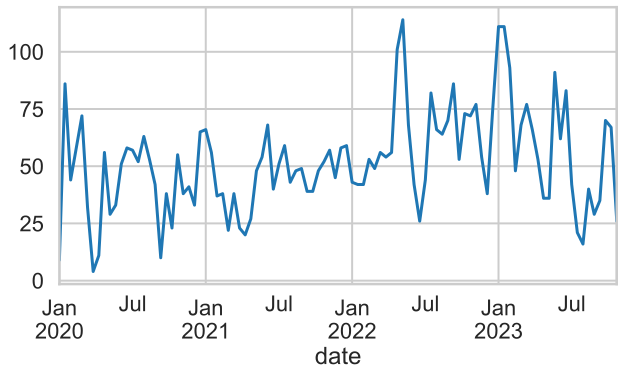

In [71]:
(insp.resample('2W', on='date')
 .size()
 .plot()
);

### The `.dt` accessor

- Like with Series of strings, `pandas` has a `.dt` accessor for properties of Timestamps.
- https://pandas.pydata.org/docs/user_guide/basics.html#basics-dt-accessors

In [72]:
insp['date'].dt.day

0       16
1        3
2        3
3       20
        ..
5175    14
5176     6
5177     9
5178    30
Name: date, Length: 5179, dtype: int64

In [73]:
insp['date'].dt.dayofweek

0       3
1       0
2       3
3       2
       ..
5175    3
5176    0
5177    4
5178    2
Name: date, Length: 5179, dtype: int64

In [74]:
dow_counts = (
    insp.assign(dow=insp['date'].dt.dayofweek)
    .groupby('dow')
    .size()
)
px.bar(dow_counts)

## Data Cleaning: Modifying Structure

We often reshape the dataframe's structure to make it more convenient for analysis. For example, we can:

- Simplify structure by removing columns or taking a set of rows for a particular period of time or geographic area.
    - Already did this!
- Adjust granularity by aggregating rows together.
- Reshape structure, most commonly by using `df.melt()` to un-pivot a dataframe.

### Using `melt`

- `melt()` is common enough that we'll give it a special mention.
- Often encounter pivot tables (esp from government data), which we call *wide* data, and we want to reshape into *long* form:

<center><img src='imgs/wide-vs-long.svg' width=40%></center>

- With long-form data, we can group by both year and month. Hard to do that with the wide-form data!
- Long-form data is also called *tidy* data.

## Student-Submitted Questions

- Come up with a question or two that you want to answer with the data.
    - E.g. "What are the most common violations around UCSD?"
- I will (attempt to) answer them live and explain as we go!
- Will go until no more questions or we run out of time.
- https://wall.sli.do/event/g2dESFa2co9kwmUwqfuCNL?section=e82e38eb-254e-4eb9-9de3-341347c52119

### Fill this in with student questions

...

### Example question: What are the most common violations?

In [82]:
fig = px.bar(
    viol['kind'].value_counts().sort_values(),
    orientation='h'
)
fig.update_layout(width=1000, height=800)

## Takeaways

- Data cleaning is a necessary starting step in data analysis. 4 main things to watch out for:
    - Quality checks
    - Missing values
    - Transformations and timestamps
    - Modifying structure